In [11]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings('ignore')
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
clist1 =['#ffffff','#f8ad9d','#3a20f0','#000000']
red1 = LinearSegmentedColormap.from_list('chaos',clist1)

In [13]:
with open('/N/project/Zli_lab/Data/GSDR/QC_d_data_US/US_010008.txt', 'r') as file:
    lines = file.readlines()

In [8]:
lat, lon, elev, number_of_record, perc_miss, start_date, end_date, time_zone = [], [], [], [], [], [], [], []
directory = 'QC_d_data_US/'

file_count = 0

for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_count += 1
        file_path = os.path.join(directory, filename)
        
        with open(file_path, 'r') as file:
            lines = file.readlines()
            lines = lines[0:21]
            lat.extend([float(line.split(': ')[1].strip()) for line in lines if 'Latitude' in line])
            lon.extend([float(line.split(': ')[1].strip()) for line in lines if 'Longitude' in line])
            elev.extend([float(line.split(': ')[1].replace('m', '').strip()) for line in lines if 'Elevation' in line])
            number_of_record.extend([int(line.split(': ')[1].strip()) for line in lines if 'Number of records' in line])
            perc_miss.extend([float(line.split(': ')[1].strip()) for line in lines if 'Percent missing data' in line])
            start_date.extend([line.split(': ')[1].strip() for line in lines if 'Start datetime' in line])
            end_date.extend([line.split(': ')[1].strip() for line in lines if 'End datetime' in line])
            time_zone.extend([line.split(': ')[1].strip() for line in lines if 'Time Zone' in line])
        if file_count % 1000 == 0:
            print("I'm OK "+str(file_count))

FileNotFoundError: [Errno 2] No such file or directory: 'QC_d_data_US/'

In [9]:
data = {
    'latitude': lat,
    'longitude': lon,
    'elevation': elev,
    'number of record': number_of_record,
    'percentage of missing data': perc_miss,
    'start datetime': start_date,
    'end datetime': end_date,
    'time zone': time_zone
}
df = pd.DataFrame(data)
# df.to_csv('basci_info_GSDR.csv', index=False)

In [10]:
df

,latitude,longitude,elevation,number of record,percentage of missing data,start datetime,end datetime,time zone


In [14]:
df = pd.read_csv('/N/project/Zli_lab/Data/GSDR/basci_info_GSDR.csv')

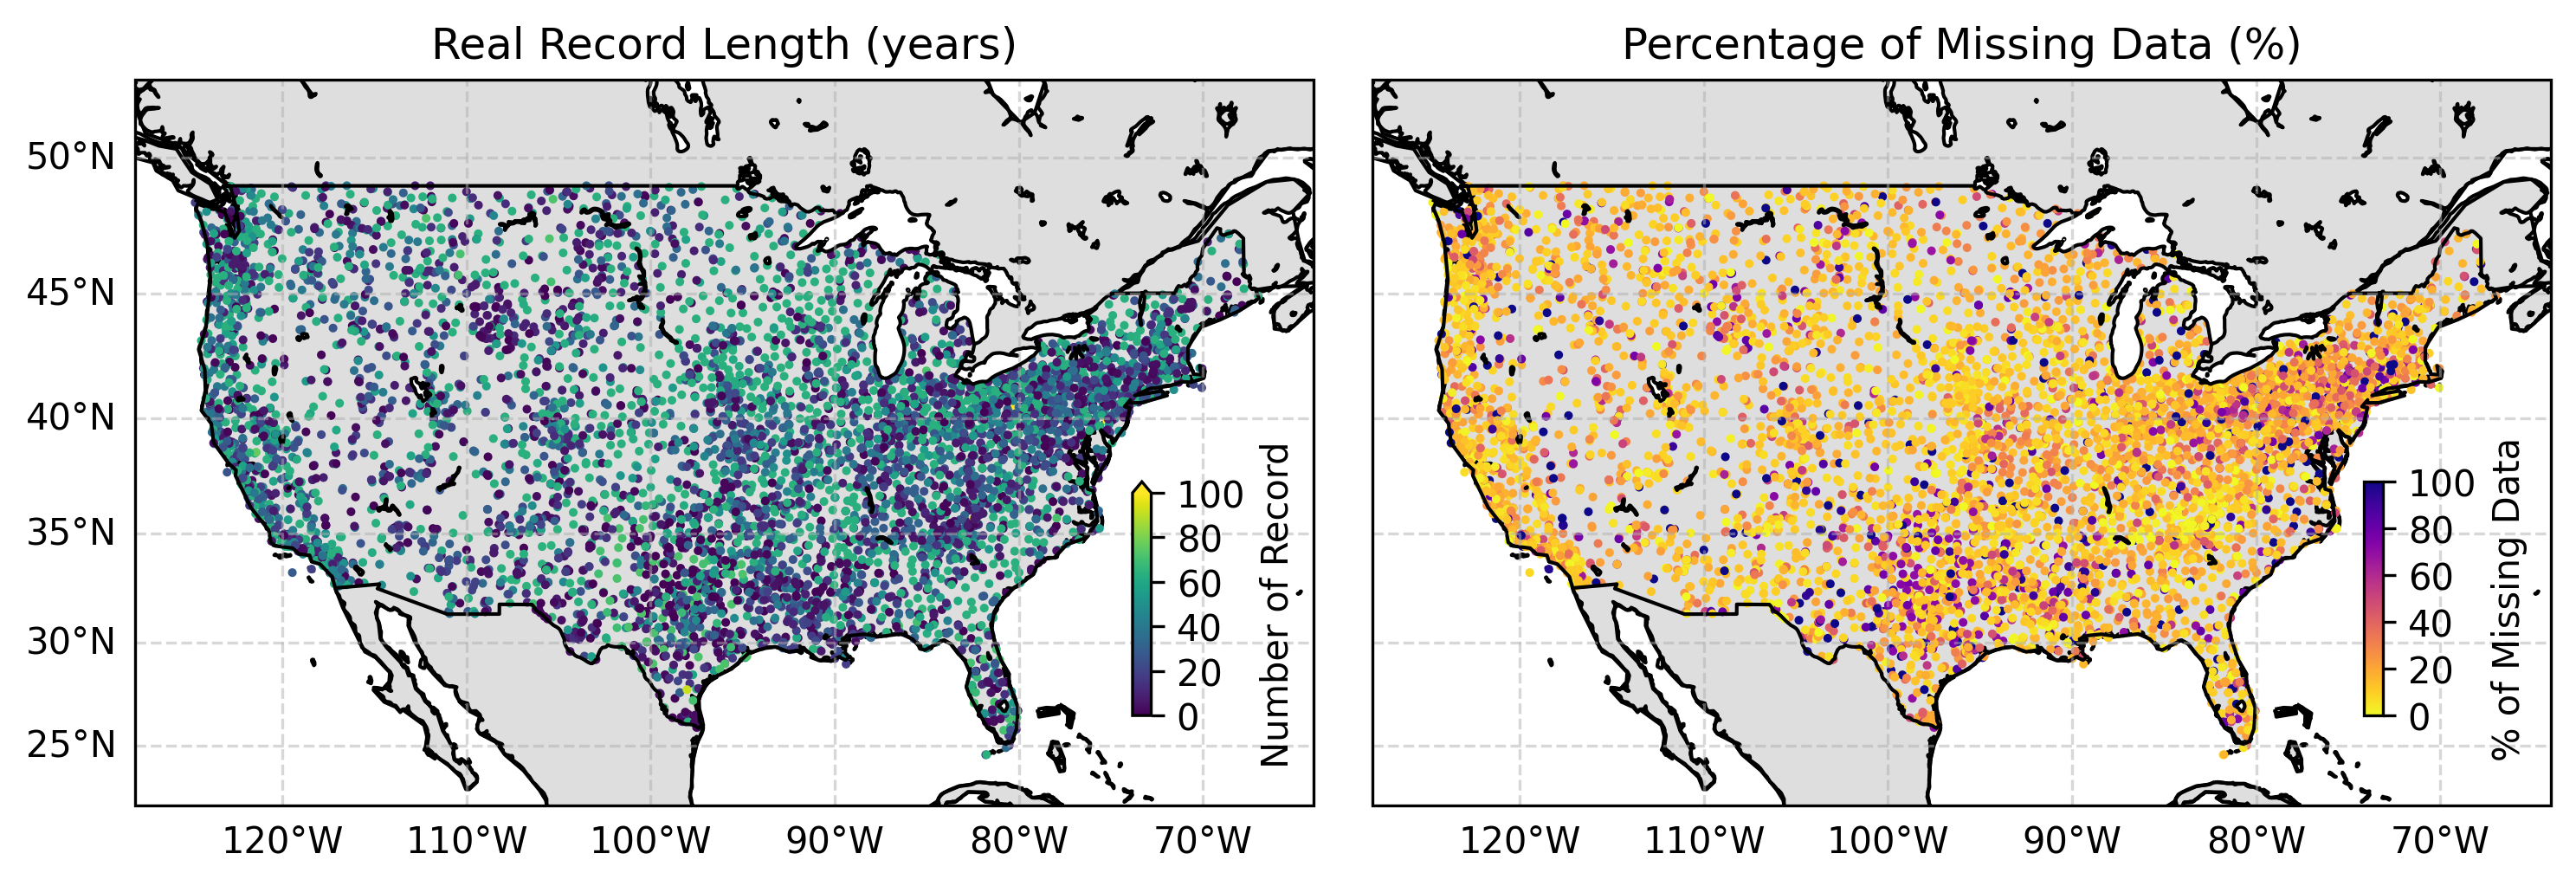

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=300, subplot_kw={'projection': ccrs.Mercator()})
extent = [-128, -64, 22, 48]

for ax in axes:
    ax.set_extent(extent, crs=ccrs.Geodetic())
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='#dedede')
    ax.add_feature(cfeature.BORDERS, linestyle='-')
    ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='w')
    ax.coastlines(resolution='110m')

# Plot for Real Record Length (years)
axes[0].set_title('Real Record Length (years)')
sc1 = axes[0].scatter(df['longitude'], df['latitude'], c=df['number of record']/8760, cmap='viridis', s=2, transform=ccrs.Geodetic())
cax1 = fig.add_axes([0.445, 0.32, 0.006, 0.15]) 
cbar1 = plt.colorbar(sc1, cax=cax1,extend='max')
cbar1.set_label('Number of Record')
sc1.set_clim(vmin=0.0, vmax=100)
cbar1.set_ticks([0, 20, 40, 60, 80, 100])
gridlines1 = axes[0].gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gridlines1.right_labels = False  
gridlines1.top_labels = False    

# Plot for Percentage of Missing Data (%)
axes[1].set_title('Percentage of Missing Data (%)')
sc2 = axes[1].scatter(df['longitude'], df['latitude'], c=df['percentage of missing data'], cmap='plasma_r', s=2, transform=ccrs.Geodetic())

cax2 = fig.add_axes([0.84, 0.32, 0.006, 0.15]) 
cbar2 = plt.colorbar(sc2, cax=cax2,)
cbar2.set_label('% of Missing Data')
sc2.set_clim(vmin=0.0, vmax=100)
cbar2.set_ticks([0, 20, 40, 60, 80, 100])
gridlines2 = axes[1].gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gridlines2.right_labels = False  
gridlines2.top_labels = False   
gridlines2.left_labels = False  

fig.subplots_adjust(wspace=0.05)
plt.show()